In [113]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
tags = pd.read_csv('tags.csv')
tag_counts = pd.read_csv('book_tags.csv')
books = pd.read_csv('books.csv')
ratings = pd.read_csv('ratings.csv')
to_read = pd.read_csv('to_read.csv')

In [11]:
tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [12]:
tag_counts.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [13]:
books.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [14]:
ratings.head()

,book_id,user_id,rating
0,1,314,5
1,1,439,3
2,1,588,5
3,1,1169,4
4,1,1185,4


In [15]:
to_read.head()

,user_id,book_id
0,1,112
1,1,235
2,1,533
3,1,1198
4,1,1874


In [21]:
year_groups = books.groupby('original_publication_year')
year_groups

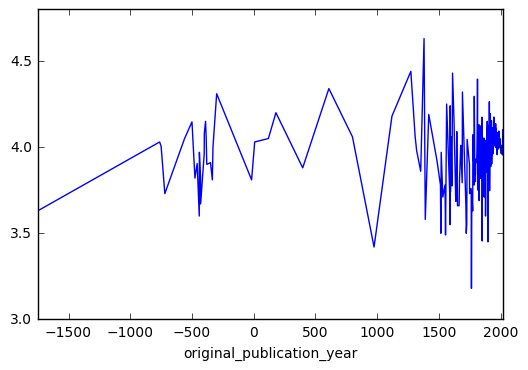

In [30]:
average_rating_over_time = year_groups.average_rating.mean()
average_rating_over_time.plot()

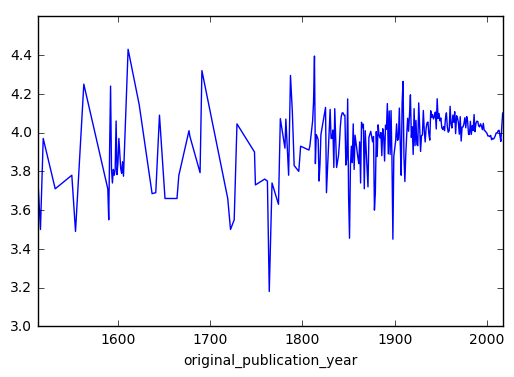

In [55]:
average_rating_over_time_1500 = average_rating_over_time.where(average_rating_over_time.keys() > 1500).dropna()
average_rating_over_time_1500.plot()

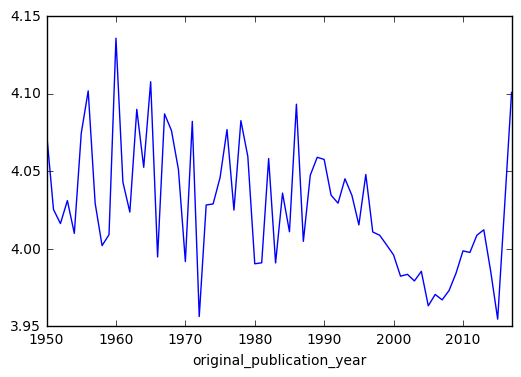

In [56]:
average_rating_over_time_1950 = average_rating_over_time.where(average_rating_over_time.keys() >= 1950).dropna()
average_rating_over_time_1950.plot()

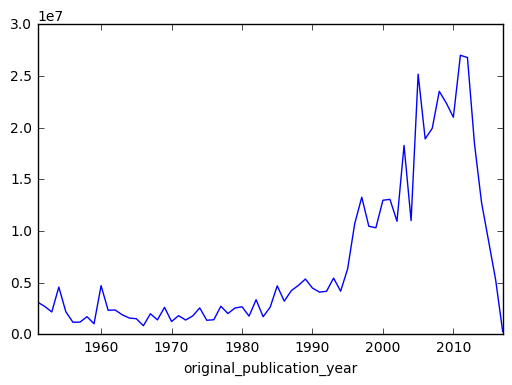

In [59]:
# is volatility due to how many people have actually rated?
# there are probably more ratings in recent times.
reading_over_time = year_groups.ratings_count.sum()
reading_over_time_1950 = reading_over_time.where(reading_over_time.keys() > 1950).dropna()
reading_over_time_1950.plot()

In [62]:
tags.shape, tag_counts.shape

((34252, 2), (999912, 3))

In [104]:
# what are the most popular tags? 
tag_data = pd.merge(tags, tag_counts, on='tag_id').groupby('tag_id').sum()
tag_data.drop(['goodreads_book_id'], axis=1, inplace=True)
tag_data = pd.merge(tag_data, tags, left_index=True, right_on='tag_id')
sorted_tag_data = tag_data.sort_values(['count'], ascending=False)

# people are aspirational by 2 orders of magnitude more than they are productive
sorted_tag_data.head(10)

,count,tag_id,tag_name
30574,140718761,30574,to-read
8717,7507958,8717,currently-reading
11557,4503173,11557,favorites
11743,3688819,11743,fiction
11305,3548157,11305,fantasy
33114,1848306,33114,young-adult
7457,1756920,7457,classics
5207,1317235,5207,books-i-own
26138,1231926,26138,romance
22743,1224279,22743,owned


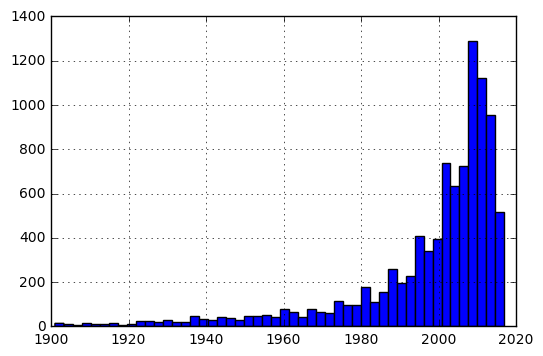

In [127]:
# published books over time (after 1900)
books[books.original_publication_year > 1900].original_publication_year.hist(bins=50)

In [164]:
# average rating of each of the top categories?
tag_names = tag_counts.copy()
tag_names['book_id'] = tag_names.goodreads_book_id
tag_names = pd.merge(tag_names, tags, on='tag_id')
tag_names.drop(['goodreads_book_id', 'tag_id'], axis=1, inplace=True)
tag_names.head()

,count,book_id,tag_name
0,167697,1,to-read
1,24549,2,to-read
2,496107,3,to-read
3,11909,5,to-read
4,298,6,to-read


In [182]:
ratings = pd.DataFrame(columns=['book_id', 'average_rating'])
ratings.book_id = books.book_id
ratings.average_rating = books.average_rating

# count is the tag count
tags_with_ratings = pd.merge(tag_names, ratings, on='book_id')
tags_with_ratings.drop(['count', 'book_id'], axis=1, inplace=True)

## Most popular tag based on number of books, not number of tags
popular_tags_based_on_books = tags_with_ratings.groupby('tag_name').count().sort_values(['average_rating'], ascending=False)
popular_tags_based_on_books

,average_rating
tag_name,
to-read,9983
favorites,9881
owned,9858
books-i-own,9799
currently-reading,9776
library,9415
owned-books,9221
fiction,9097
to-buy,8692


In [192]:
# average rating of most popular categories?
top_500_categories = popular_tags_based_on_books.head(500).index
top_500_categories

Index(['to-read', 'favorites', 'owned', 'books-i-own', 'currently-reading',
       'library', 'owned-books', 'fiction', 'to-buy', 'kindle',
       ...
       'nonfic', 'autobiography-memoir', 'space', 'award-winners',
       'partially-read', '1001-to-read', 'werewolves', 'read-as-a-child',
       'faith', 'guilty-pleasure'],
      dtype='object', name='tag_name', length=500)

In [201]:
top_500_tags_ratings = tags_with_ratings[tags_with_ratings.tag_name.isin(top_500_categories)]
sorted_top_rated_tags = top_500_tags_ratings.groupby(['tag_name']).mean().sort_values(['average_rating'], ascending=False)

In [202]:
sorted_top_rated_tags.head(10)

,average_rating
tag_name,
5-star,4.269784
comics-manga,4.245169
picture-books,4.221658
comic-books,4.220400
comics-graphic-novels,4.218390
comics-and-graphic-novels,4.217915
graphic-novels-and-comics,4.217685
comic,4.214871
graphic-novels-comics,4.214269


In [203]:
sorted_top_rated_tags.tail(10)

,average_rating
tag_name,
chic-lit,3.807898
chicklit,3.794334
read-in-2008,3.789487
stopped-reading,3.789331
gave-up-on,3.781078
womens-fiction,3.776495
women-s-fiction,3.769772
couldn-t-finish,3.750403
gave-up,3.730121


In [247]:
user_ratings = pd.read_csv('ratings.csv')
user_ratings_and_books = pd.merge(user_ratings, books, on='book_id')
user_network_data = pd.DataFrame(columns=['book', 'user_id', 'rating'])
user_network_data.book = user_ratings_and_books.original_title
user_network_data.user_id = user_ratings_and_books.user_id
user_network_data.rating = user_ratings_and_books.rating

In [248]:
# this sample isn't the most accurate representation of what's on the goodreads website
# for ex: still life has 4.04 from 60k ratings but a 4.78 on here with 100 ratings
sorted_books = user_network_data.groupby('book').mean().sort_values(['rating'], ascending=False)
sorted_books.head()

,user_id,rating
book,,
Still Life with Woodpecker,16439.313131,4.777778
The Beautiful and Damned,27160.370000,4.660000
Villa Incognito,29339.969072,4.618557
Peter and the Shadow Thieves,30165.500000,4.557143
The Taste of Home Cookbook,25043.130000,4.550000


In [249]:
sorted_books.tail()

,user_id,rating
book,,
The Woman in White,22867.17,2.88
The Chamber,16083.36,2.88
The Pearls of Lutra,22194.70,2.80
The Fellowship of the Ring,30932.33,2.77
Nine Stories,16445.05,2.53


In [250]:
def check(book):
    return user_network_data[user_network_data.book == book].rating.mean()

In [251]:
check("A Supposedly Fun Thing I'll Never Do Again: Essays and Arguments")

3.3

In [253]:
check("Harry Potter and the Half-Blood Prince")

4.24

In [254]:
user_network_data.shape

(79701, 3)

In [255]:
user_network_data.head()

,book,user_id,rating
0,Harry Potter and the Half-Blood Prince,314,5
1,Harry Potter and the Half-Blood Prince,439,3
2,Harry Potter and the Half-Blood Prince,588,5
3,Harry Potter and the Half-Blood Prince,1169,4
4,Harry Potter and the Half-Blood Prince,1185,4


In [256]:
user_network_data.to_json('user_network_data.json')

In [279]:
# Network based on tags shared between books
book_tags = pd.read_csv('book_tags.csv')
book_tags['book_id'] = book_tags.goodreads_book_id
books_with_tags = pd.merge(pd.merge(book_tags, books, on='book_id'), tags, on='tag_id')

books_with_tags.shape, books.shape, book_tags.shape

((999912, 27), (10000, 23), (999912, 4))

In [296]:
tag_network_data = books_with_tags[['original_title', 'tag_name', 'count']]
tag_network_data.columns = ['title', 'tag', 'tag_count']
tag_network_data = tag_network_data.dropna()
tag_network_data.shape

tag_network_data.to_json('tag_network_data.json')

In [336]:
# to read vs. read scatter plot
read_books = books[['book_id', 'original_publication_year', 'average_rating', 'ratings_count', 'original_title']]
unread_counts = to_read.groupby('book_id').count()
unread_counts.columns = ['unread_count']
unread_counts.head()

,unread_count
book_id,
1,973
2,400
3,287
4,1478
5,1293


In [337]:
def check_grouping(book_id):
    return to_read[to_read.book_id == book_id].shape[0]

In [338]:
check_grouping(1), check_grouping(2), check_grouping(3), check_grouping(4), check_grouping(5)

(973, 400, 287, 1478, 1293)

In [388]:
# NOTE: user can give a rating even if they haven't read it, so can't compare ratings_count with unread_count

unread_counts.head()

,unread_count,book_id
book_id,,
1,973,1
2,400,2
3,287,3
4,1478,4
5,1293,5


In [389]:
read_books.sort_values('book_id').head()

,book_id,original_publication_year,average_rating,ratings_count,original_title
26,1,2005.0,4.54,1678823,Harry Potter and the Half-Blood Prince
20,2,2003.0,4.46,1735368,Harry Potter and the Order of the Phoenix
1,3,1997.0,4.44,4602479,Harry Potter and the Philosopher's Stone
17,5,1999.0,4.53,1832823,Harry Potter and the Prisoner of Azkaban
23,6,2000.0,4.53,1753043,Harry Potter and the Goblet of Fire


In [390]:
unread_counts.shape, read_books.shape

((9986, 2), (10000, 5))

In [391]:
# to_read and rated book ids only have 811 in common
unread_book_ids = unread_counts.book_id
rated_book_ids = read_books.book_id
len(set(unread_book_ids) & set(rated_book_ids))

811

In [399]:
# What are the most unread books?
unread_with_title = pd.merge(unread_counts, read_books, right_on='book_id', left_index=True).dropna()
unread_with_title.shape, unread_counts.shape, read_books.shape

unread_with_title.sort_values(['unread_count'], ascending=False)[['original_title', 'unread_count', 'average_rating']].head(20)

,original_title,unread_count,average_rating
336,The Ultimate Hitchhiker's Guide: Five Complete...,1812,4.37
53,The Hitchhiker's Guide to the Galaxy,1767,4.20
3229,The Lord of the Rings: The Art of The Fellowsh...,1499,4.59
23,Harry Potter and the Goblet of Fire,1484,4.53
3503,The Known World,1352,3.82
17,Harry Potter and the Prisoner of Azkaban,1293,4.53
1448,Notes from a Small Island,1148,3.91
3752,"Harry Potter Collection (Harry Potter, #1-6)",1110,4.73
188,The Lord of the Rings,1094,4.47
5071,The Salmon of Doubt: Hitchhiking the Galaxy On...,1069,3.92


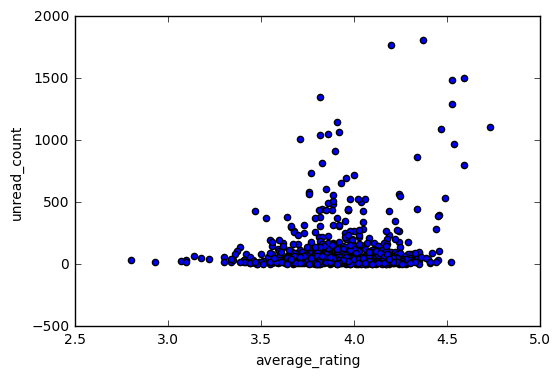

In [401]:
# scatter plot of rating vs. unread
unread_with_title.plot.scatter('average_rating', 'unread_count')

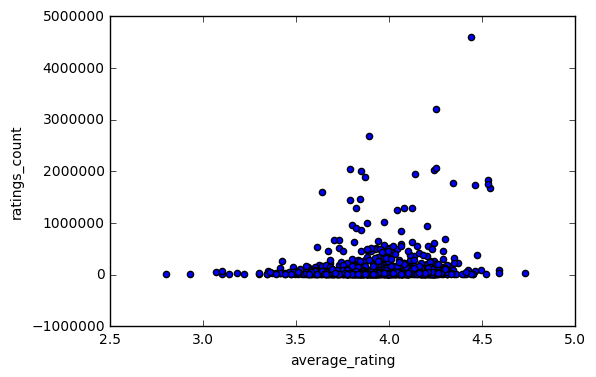

In [406]:
# scatter plot of rating vs. num ratings
unread_with_title.plot.scatter('average_rating', 'ratings_count')

In [417]:
gave_up_tags = [
    'stopped-reading',
    'gave-up-on',
    'gave-up',
    'couldn-t-finish',
    'could-not-finish',
    'unfinished',
    'not-finished',
    'did-not-finish',
    'stopped']
gave_up_counts = sorted_tag_data[sorted_tag_data.tag_name.isin(gave_up_tags)]
gave_up_counts

,count,tag_id,tag_name
9477,86567,9477,did-not-finish
31505,50108,31505,unfinished
8346,16775,8346,couldn-t-finish
12869,14315,12869,gave-up-on
12868,7250,12868,gave-up
8344,4392,8344,could-not-finish
28740,3970,28740,stopped-reading
21915,1466,21915,not-finished
28739,13,28739,stopped


In [422]:
# 184,856 failures of diligence
gave_up_counts['count'].sum()

184856

In [457]:
# which books could readers not finish?
book_tags = pd.read_csv('book_tags.csv')
gave_up_tag_data = pd.merge(gave_up_counts[['tag_id', 'tag_name']], book_tags, on='tag_id')
gave_up_tag_data.columns = ['tag_id', 'tag_name', 'book_id', 'count']
gave_up_tag_data = pd.merge(gave_up_tag_data, books[['book_id', 'original_title', 'average_rating']], on='book_id')
popular_unfinished_books = gave_up_tag_data[['original_title', 'count', 'average_rating']].groupby('original_title').sum().sort_values(['count'], ascending=False)
counts_per_group = gave_up_tag_data[['original_title', 'count', 'average_rating']].groupby('original_title').count()['count']
popular_unfinished_books.average_rating /= counts_per_group
popular_unfinished_books

,count,average_rating
original_title,,
Catch-22,1156,3.98
"Eat, pray, love: one woman's search for everything across Italy, India and Indonesia",1108,3.51
Wicked: The Life and Times of the Wicked Witch of the West,994,3.52
The Goldfinch,986,3.87
Outlander,926,4.20
Wolf Hall,886,3.85
A Game of Thrones,846,4.45
Jonathan Strange & Mr Norrell,770,3.80
American Gods,768,4.11


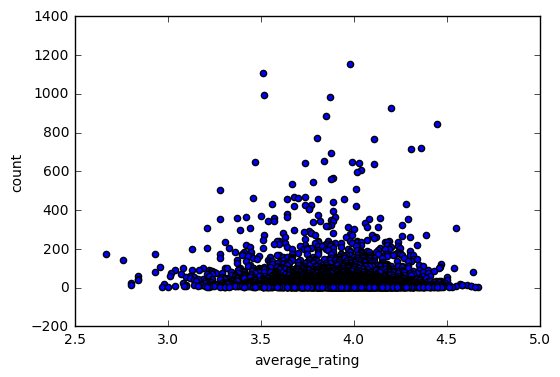

In [459]:
# scatter plot of unfinished book x rating
popular_unfinished_books.plot.scatter('average_rating', 'count')

In [468]:
# Which books do people want to read next?
# 30574 == tag id of to-read

def popular_books_with_tag(tag_id):
    book_tags['book_id'] = book_tags.goodreads_book_id
    df = pd.merge(books[['book_id', 'original_title']], book_tags[book_tags.tag_id == tag_id], on='book_id')
    return df[['original_title', 'count']].groupby('original_title').sum().sort_values('count', ascending=False)
    
popular_books_with_tag(30574).head(10)

,count
original_title,
O Alquimista,596234
Män som hatar kvinnor,586235
Harry Potter and the Philosopher's Stone,496107
Les Misérables,488469
Cinder,474954
Catch-22,465640
Gone with the Wind,454565
"Slaughterhouse-Five, or The Children's Crusade: A Duty-Dance with Death",443942
Memoirs of a Geisha,436097


In [469]:
# Which books are people currently reading?
# tag id = 8717
popular_books_with_tag(8717).head(10)

,count
original_title,
James Potter and the Hall of Elders' Crossing,77785
Les Misérables,64311
The Handmaid's Tale,47919
Harry Potter and the Philosopher's Stone,44640
The Picture of Dorian Gray,39631
The Hunger Games,35418
A Tale of Two Cities,33064
A Clash of Kings,31475
Dracula,28995


In [472]:
# What are people's favorites?
# tag id = 11557
# Fault in our stars, gross.
popular_books_with_tag(11557).head(10)

,count
original_title,
The Hunger Games,50755
Harry Potter and the Philosopher's Stone,48220
Harry Potter and the Deathly Hallows,40884
Harry Potter and the Prisoner of Azkaban,40087
The Fault in Our Stars,35724
Harry Potter and the Half-Blood Prince,34173
Pride and Prejudice,31163
To Kill a Mockingbird,30903
The Book Thief,30427


In [476]:
# What are most popular classics? 7457
# Conclusion: people don't really move on from middle school
popular_books_with_tag(7457).head(10)

,count
original_title,
Pride and Prejudice,35772
The Great Gatsby,32061
To Kill a Mockingbird,31068
Wuthering Heights,23760
The Catcher in the Rye,22118
Animal Farm: A Fairy Story,22106
Little Women,20533
Lord of the Flies,20516
An Excellent conceited Tragedie of Romeo and Juliet,20507


In [477]:
# What are most popular fantasy? 11305
# Harry Potter & LotR
popular_books_with_tag(11305).head(10)

,count
original_title,
Harry Potter and the Philosopher's Stone,47478
The Hobbit or There and Back Again,41786
Harry Potter and the Chamber of Secrets,39501
Harry Potter and the Prisoner of Azkaban,39330
Harry Potter and the Goblet of Fire,38378
Harry Potter and the Deathly Hallows,37296
Harry Potter and the Half-Blood Prince,37174
The Fellowship of the Ring,31618
A Clash of Kings,26692


In [481]:
# What are most popular fiction? 11743
popular_books_with_tag(11743).head(10)

,count
original_title,
The Great Gatsby,15360
Nineteen Eighty-Four,15044
The Hunger Games,13819
The Da Vinci Code,13725
The Catcher in the Rye,13435
Harry Potter and the Philosopher's Stone,13239
Animal Farm: A Fairy Story,12944
The Kite Runner,11711
The Hobbit or There and Back Again,11206


In [482]:
# Most popular sci-fi? 26771
popular_books_with_tag(26771).head(10)

,count
original_title,
Ender's Game,12349
The Hitchhiker's Guide to the Galaxy,9773
Dune,8479
The Martian,7905
The Hunger Games,6211
Fahrenheit 451,5796
Nineteen Eighty-Four,5459
Foundation,5405
Brave New World,5344


In [484]:
# Most popular audiobooks? 3389
popular_books_with_tag(3389).head(10)

,count
original_title,
Bossypants,1588
Yes Please,1556
The Girl on the Train,1238
The Martian,1193
Harry Potter and the Philosopher's Stone,1143
Harry Potter and the Chamber of Secrets,1009
Harry Potter and the Prisoner of Azkaban,966
Harry Potter and the Goblet of Fire,910
The Hunger Games,880


In [486]:
# Most popular literature? 18367
popular_books_with_tag(18367).head(10)

,count
original_title,
The Great Gatsby,2697
To Kill a Mockingbird,2505
Nineteen Eighty-Four,2345
The Catcher in the Rye,2186
Pride and Prejudice,2175
Animal Farm: A Fairy Story,2175
Lord of the Flies,1778
Of Mice and Men,1688
Jane Eyre,1644


In [488]:
# Most popular novels? 22034
popular_books_with_tag(22034).head(10)

,count
original_title,
Nineteen Eighty-Four,1535
The Great Gatsby,1361
To Kill a Mockingbird,1347
The Catcher in the Rye,1281
Animal Farm: A Fairy Story,1211
O Alquimista,1194
Harry Potter and the Philosopher's Stone,1082
Pride and Prejudice,1057
The Da Vinci Code,1018


In [ ]:
# popularity of category across time
# rating over time of major categories (over time referring to book publishing date, not rating date)
# sorted_tag_data.head(50)